## Assignment 1: Introduction to Data Science and Python
### Stefan Dimitrov Velev, 0MI3400521, Big Data Technologies
### Faculty of Mathematics and Informatics, Sofia University

#### 1. Import required Python packages

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

#### 2. Read the CSV file - **Life expectancy vs. GDP per capita, 2022**
*Data source: UN, World Population Prospects (2024); World Bank (2023)*

https://ourworldindata.org/grapher/life-expectancy-un-vs-gdp-per-capita-wb

In [141]:
df = pd.read_csv('./data/life-expectancy-un-vs-gdp-per-capita-wb.csv', delimiter=',')

In [142]:
df.head()

,Entity,Code,Year,Life expectancy - Sex: all - Age: 0 - Variant: estimates,"GDP per capita, PPP (constant 2017 international $)",Population (historical),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,-10000,NaN,NaN,14737.0,NaN
2,Afghanistan,AFG,-9000,NaN,NaN,20405.0,NaN
3,Afghanistan,AFG,-8000,NaN,NaN,28253.0,NaN
4,Afghanistan,AFG,-7000,NaN,NaN,39120.0,NaN


In [143]:
print("The number of rows in the dataframe is: ", len(df))

The number of rows in the dataframe is:  59858


#### 3. Data Cleaning

In [144]:
# Remove the unnecessary columns in the data frame
df = df[['Entity', 'Year', 'Life expectancy - Sex: all - Age: 0 - Variant: estimates', 'GDP per capita, PPP (constant 2017 international $)', 'Population (historical)']]

In [145]:
# Rename the applicable columns
df = df.rename(columns={'Entity': 'Country', 'Life expectancy - Sex: all - Age: 0 - Variant: estimates': 'Life expectancy', 'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita', 'Population (historical)': 'Population'})

In [146]:
# Leaving only rows for year 2022
df = df[df['Year'] == 2022]

In [147]:
# Remove rows with missing values
df = df.dropna()

In [148]:
# Remove not-country-specific entries
df = df[df['Country'] != 'High-income countries']
df = df[df['Country'] != 'Low-income countries']
df = df[df['Country'] != 'Lower-middle-income countries']
df = df[df['Country'] != 'Upper-middle-income countries']
df = df[df['Country'] != 'World']

In [149]:
# Correct the Central African Republic life expectancy according the World Bank Report for 2022
# Source: https://data.worldbank.org/indicator/SP.DYN.LE00.IN
df.loc[df['Country'] == 'Central African Republic', 'Life expectancy'] = 54.48

In [150]:
df.count()

Country            188
Year               188
Life expectancy    188
GDP per capita     188
Population         188
dtype: int64

In [165]:
df[df['Country'] == 'Antigua and Barbuda']

,Country,Year,Life expectancy,GDP per capita,Population
2223,Antigua and Barbuda,2022,77.483,22321.87,92851.0


#### 4. Draw a scatter plot of GDP per capita vs Life expectancy for 2022

<Axes: xlabel='GDP per capita', ylabel='Life expectancy'>

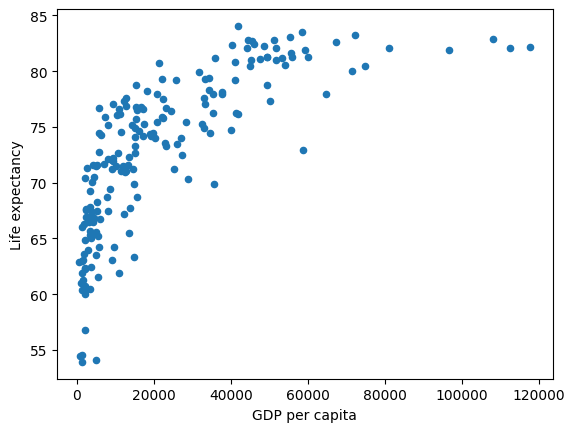

In [152]:
df.plot.scatter(x='GDP per capita', y='Life expectancy')

Text(0.5, 1.0, 'GDP per Capita vs Life Expectancy for 2022')

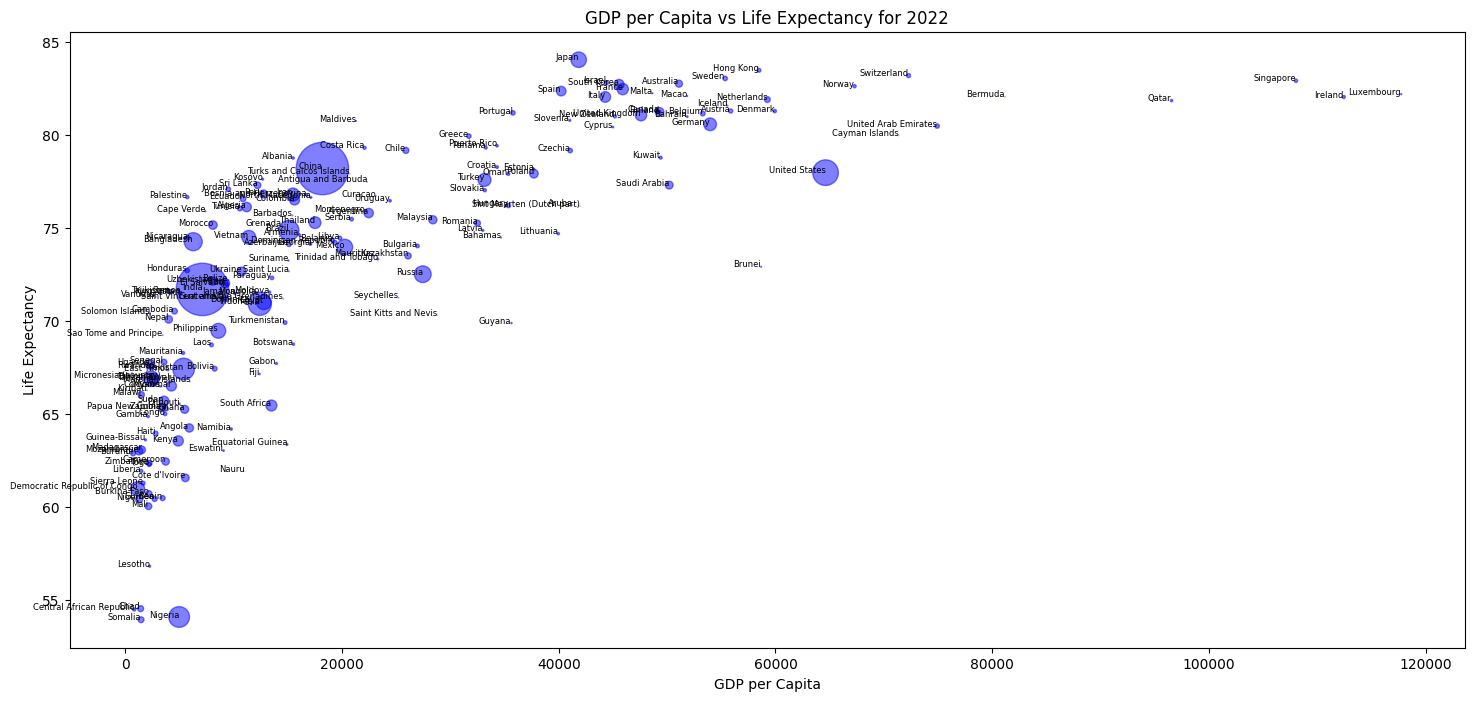

In [164]:
plt.figure(figsize=(18, 8))
plt.scatter(df['GDP per capita'], df['Life expectancy'], color='blue', s = df['Population']/1000000, alpha=0.5)

#plt.xticks([1000, 2000, 5000, 10000, 20000, 50000, 100000])

for i, country in enumerate(df['Country']):
    plt.text(df['GDP per capita'].iloc[i], df['Life expectancy'].iloc[i], df['Country'].iloc[i], fontsize=6, ha='right')
    
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy for 2022')


Text(0.5, 1.0, 'GDP per Capita vs Life Expectancy for 2022')

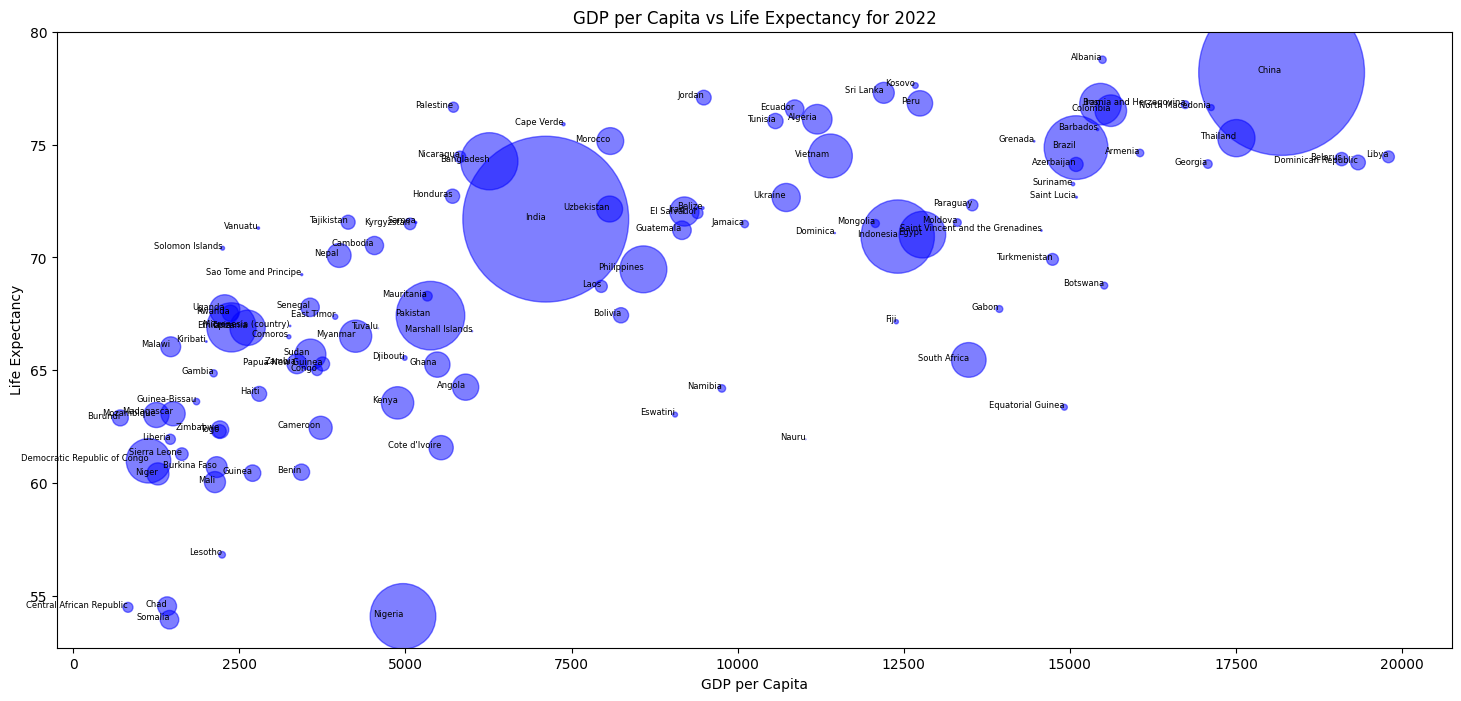

In [167]:
plt.figure(figsize=(18, 8))
df_lower_GDP = df[df['GDP per capita'] <= 20000]
plt.scatter(df_lower_GDP['GDP per capita'], df_lower_GDP['Life expectancy'], color='blue', s = df_lower_GDP['Population']/200000, alpha=0.5)

#plt.xticks([1000, 2000, 5000, 10000, 20000, 50000, 100000])

for i, country in enumerate(df_lower_GDP['Country']):
    plt.text(df_lower_GDP['GDP per capita'].iloc[i], df_lower_GDP['Life expectancy'].iloc[i], df_lower_GDP['Country'].iloc[i], fontsize=6, ha='right')
    
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy for 2022')


Text(0.5, 1.0, 'GDP per Capita vs Life Expectancy for 2022')

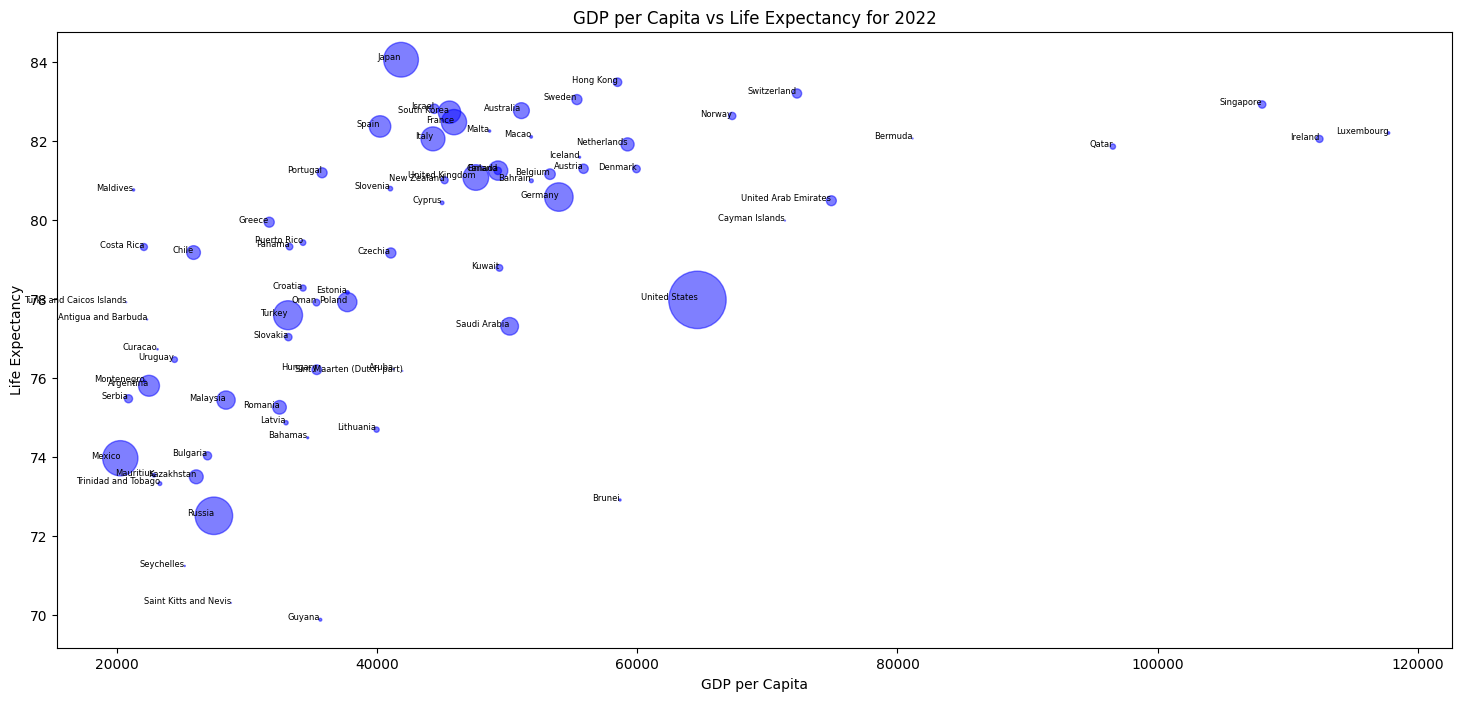

In [168]:
plt.figure(figsize=(18, 8))
df_higher_GDP = df[df['GDP per capita'] >= 20000]
plt.scatter(df_higher_GDP['GDP per capita'], df_higher_GDP['Life expectancy'], color='blue', s = df_higher_GDP['Population']/200000, alpha=0.5)

#plt.xticks([1000, 2000, 5000, 10000, 20000, 50000, 100000])

for i, country in enumerate(df_higher_GDP['Country']):
    plt.text(df_higher_GDP['GDP per capita'].iloc[i], df_higher_GDP['Life expectancy'].iloc[i], df_higher_GDP['Country'].iloc[i], fontsize=6, ha='right')
    
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy for 2022')
